---

# <center>★ AI / ML Project - Iris Species Classification ★

---

<img src="iris.jpg" />

---

### Description:
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species


### Objective:
- Import the Iris Dataset from sklearn library.
- Build classification models to predict the species.
- Compare the evaluation metrics of vaious classification algorithms.

---

## <center>1. Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

from sklearn.datasets import load_iris

Iris_Dataset = load_iris()
labels = load_iris().target_names
data = pd.DataFrame(load_iris().data, columns=['Sepel_Length','Sepel_Width','Petal_Length','Petal_Width'])
target = pd.DataFrame(load_iris().target, columns=['Species'])
df = pd.concat([data,target], axis=1)
display(df.head(5))
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Sepel_Length,Sepel_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Inference: The Datset consists of 5 features & 150 samples.


In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepel_Length  150 non-null    float64
 1   Sepel_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
#Checking the stats of all the columns

display(df.describe())
print('\n \033[1mInference:\033[0m The stats seem to be fine, let us do further analysis on the Dataset')

,Sepel_Length,Sepel_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



 Inference: The stats seem to be fine, let us do further analysis on the Dataset


---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


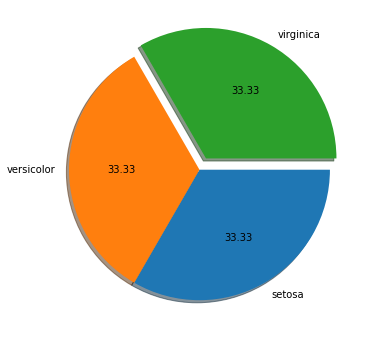


Inference: The Target Variable seems to be perfectly balanced!


In [5]:
#Let us first analyze the distribution of the target variable

print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df.Species.value_counts(), labels=labels, counterclock=False, shadow=True, explode=[0,0,0.1], autopct='%.2f', radius=1)
plt.show()

print('\n\033[1mInference:\033[0m The Target Variable seems to be perfectly balanced!')

                                                    Features Distribution                                                     


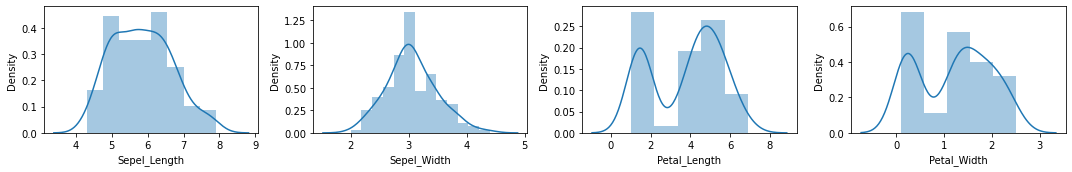

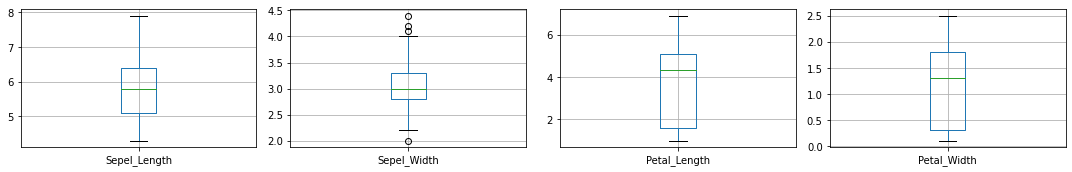


Inference: The distribution of Petal Length & Petal Width is not normal. Also there are some outliers in the Sepel Width. Let us fix them in the upcoming section


In [6]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(130))

plt.figure(figsize=[15,2.5])
for c in range(4):
    plt.subplot(1,4,c+1)
    sns.distplot(df[df.columns[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,2.5])
for c in range(4):
    plt.subplot(1,4,c+1)
    df.boxplot(df.columns[c])
plt.tight_layout()
plt.show()

print('\n\033[1mInference:\033[0m The distribution of Petal Length & Petal Width is not normal. \
Also there are some outliers in the Sepel Width. Let us fix them in the upcoming section')

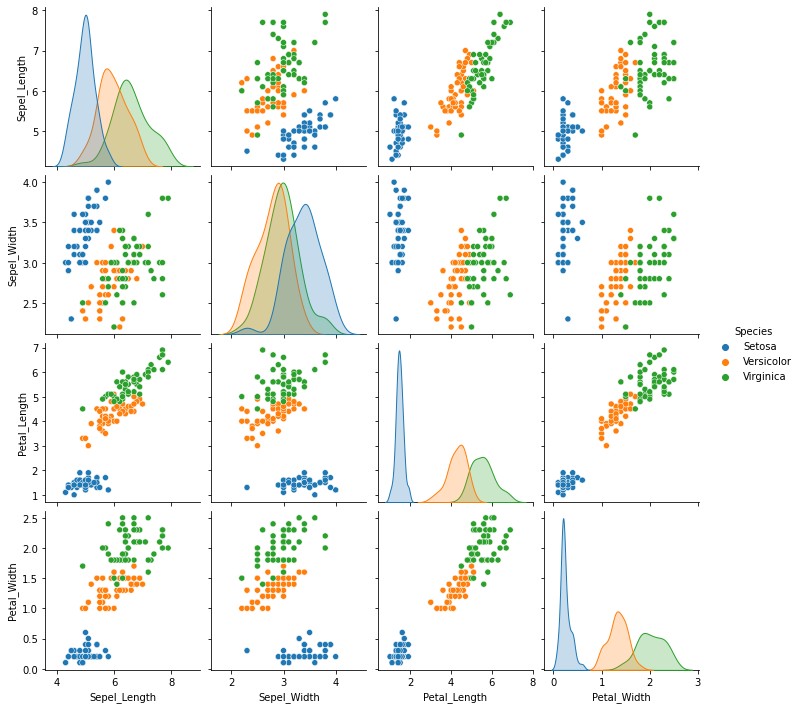


Inference: We Observe that the Setosa can be clearly distinguished, while there is some overlap between Versicolor & Virginica


In [214]:
#Understanding the relationship between all the features

df1 = df.copy()
df1.Species = df.Species.map({0:'Setosa',1:'Versicolor',2:'Virginica'})

sns.pairplot(df1, hue="Species")
plt.show()

print('\n\033[1mInference:\033[0m We Observe that the Setosa can be clearly distinguished, while there is \
some overlap between Versicolor & Virginica')

---

## <center> 3. Data Preprocessing

In [8]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

Sepel_Length    0
Sepel_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

Inference: The dataset doesn't have any null elements


In [9]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = df1.shape

df.drop_duplicates(inplace=True)

if df.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 1


In [10]:
#Removal of outlier:

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
display(df)
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Sepel_Length,Sepel_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
140,6.7,3.0,5.2,2.3,2
141,6.3,2.5,5.0,1.9,2
142,6.5,3.0,5.2,2.0,2
143,6.2,3.4,5.4,2.3,2



Inference: After removal of outliers, The dataset now has 5 features & 145 samples.


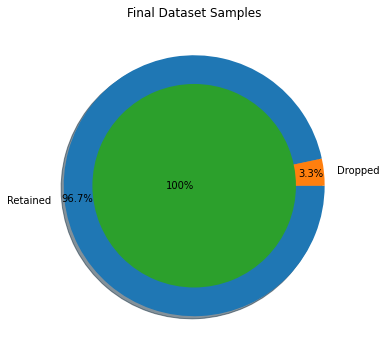

In [11]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], df1.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

---

## <center> 4. Feature Scaling

In [12]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop(['Species'],axis=1)
Y = df.Species
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (145, 4) (145,) 
Training set  --->  (116, 4) (116,) 
Testing set   --->  (29, 4)  (29,)


In [13]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Test_X_std = std.transform(Test_X)

---

## <center> 5. Predictive Modeling

In [145]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SV)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score
Logistic Regression (LR),0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0
Support Vector Machine (SV),0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0


In [219]:
#Let us define functions to summarise the Prediction's scores .

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

#Classification Summary Function
def Classification_Summary(pred,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100
    print('{}{}\033[1m{}\033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))

#Visualising Function
def ROC_plot(m):    
    pred = m.predict(Test_X)
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Area = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [176]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(Train_X_std, Train_Y)
pred = LR.predict(Test_X_std)
Classification_Summary(pred,0)

<<<-----------------------------------Logistic Regression (LR)----------------------------------->>>

Accuracy = 89.7%
F1 Score = 89.9%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  2 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.71      0.83      0.77         6
           2       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.88      0.90      0.89        29
weighted avg       0.90      0.90      0.90        29



In [177]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(Train_X_std, Train_Y)
pred = DT.predict(Test_X_std)
Classification_Summary(pred,1)

<<<-----------------------------------Decision Tree Classifier (DT)----------------------------------->>>

Accuracy = 96.6%
F1 Score = 96.5%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.83      0.91         6
           2       0.94      1.00      0.97        15

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



In [178]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(Train_X_std, Train_Y)
pred = RF.predict(Test_X_std)
Classification_Summary(pred,2)

<<<-----------------------------------Random Forest Classifier (RF)----------------------------------->>>

Accuracy = 89.7%
F1 Score = 89.9%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  2 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.71      0.83      0.77         6
           2       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.88      0.90      0.89        29
weighted avg       0.90      0.90      0.90        29



In [179]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(Train_X_std, Train_Y)
pred = NB.predict(Test_X_std)
Classification_Summary(pred,3)

<<<-----------------------------------Naïve Bayes Classifier (NB)----------------------------------->>>

Accuracy = 93.10000000000001%
F1 Score = 93.10000000000001%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        15

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29



In [180]:
from sklearn.svm import LinearSVC
SV = LinearSVC().fit(Train_X_std, Train_Y)
pred = SV.predict(Test_X_std)
Classification_Summary(pred,4)

<<<-----------------------------------Support Vector Machine (SV)----------------------------------->>>

Accuracy = 93.10000000000001%
F1 Score = 93.10000000000001%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        15

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29



In [181]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier().fit(Train_X_std, Train_Y)
pred = KNN.predict(Test_X_std)
Classification_Summary(pred,5)

<<<-----------------------------------K Nearest Neighbours (KNN)----------------------------------->>>

Accuracy = 93.10000000000001%
F1 Score = 93.30000000000001%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  6  0]
 [ 0  2 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.75      1.00      0.86         6
           2       1.00      0.87      0.93        15

    accuracy                           0.93        29
   macro avg       0.92      0.96      0.93        29
weighted avg       0.95      0.93      0.93        29



In [182]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
pred = GB.predict(Test_X_std)
Classification_Summary(pred,6)

<<<-----------------------------------Gradient Boosting (GB)----------------------------------->>>

Accuracy = 93.10000000000001%
F1 Score = 93.10000000000001%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        15

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29



In [183]:
from xgboost import XGBClassifier
XGB = XGBClassifier().fit(Train_X_std, Train_Y)
pred = XGB.predict(Test_X_std)
Classification_Summary(pred,7)

[19:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<-----------------------------------Extreme Gradient Boosting (XGB)----------------------------------->>>

Accuracy = 89.7%
F1 Score = 89.9%

 Confusiton Matrix:
 [[ 8  0  0]
 [ 0  5  1]
 [ 0  2 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.71      0.83      0.77         6
           2       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.88      0.90      0.89        29
weighted avg       0.90      0.90      0.90        29



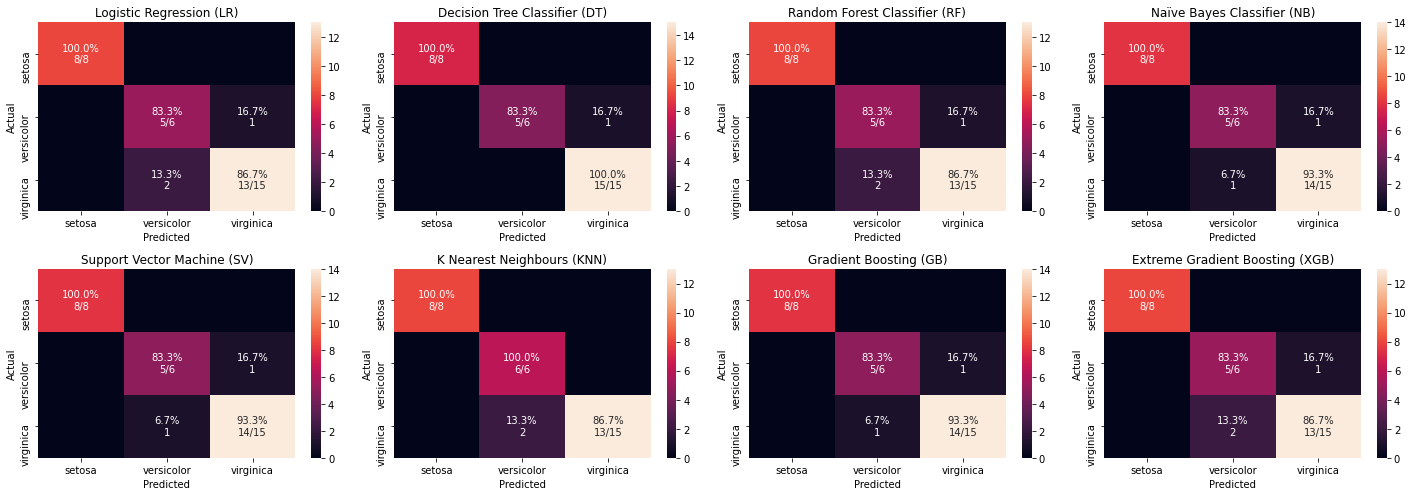

In [212]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,7])
    
    for i in range(len(all_models)):
        plt.subplot(2,4,i+1)
        pred = all_models[i].predict(Test_X_std)
        plot_cm(Test_Y, pred)
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SV,KNN,GB,XGB])

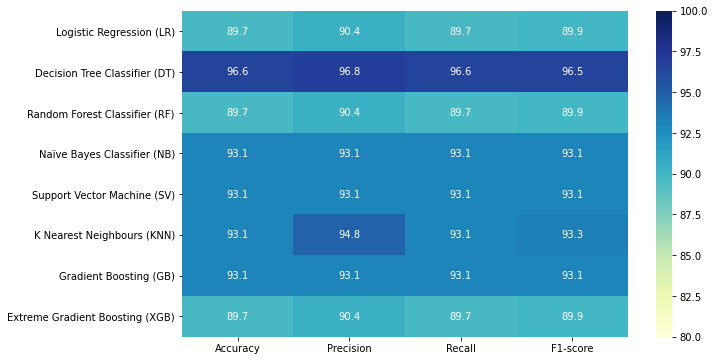

In [211]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=80.0, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

---

## <center> 6. Project Outcomes & Conclusions

#### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 150 samples & after preprocessing 3.3% of the datasamples were dropped. It was also balanced & didn't require any artificial techniques to balance it.
- Visualising the distribution of data & their relationships, helped us to get some insights on the class seperability.
- Feature selection or feature extracting as there were only 4 features, which all contributed towards the right prediction.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Decision Tree Classifier algorithm gave the best overall scores for the current dataset, yet it wise to also consider simpler models as they are more generalisable.

In [ ]:
<<<----------------------------------------------------THE END------------------------------------------------------------->>>